In [1]:
import altair as alt
import pandas as pd
from altair.expr import datum

In [2]:
candidatos = pd.read_excel('./data/interim/candidatos_2018_minimo.xlsx')
candidatos.head()

,NR_TURNO,SG_UF,DS_CARGO,NR_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO
0,1,AC,DEPUTADO FEDERAL,5555,MARIVALDO MELO,PSD,Mudança e Competência 1,PP / PSDB / PSD / MDB / DEM / SOLIDARIEDADE / ...,54,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,EMPRESÁRIO,SUPLENTE
1,1,AC,DEPUTADO ESTADUAL,50000,RONY CARTOLIN,PSOL,"FRENTE - PSOL, PV, PRP E PPL",PSOL / PV / PRP / PPL,30,MASCULINO,SUPERIOR INCOMPLETO,SOLTEIRO(A),INDÍGENA,DETETIVE PARTICULAR,SUPLENTE
2,1,AC,DEPUTADO ESTADUAL,14222,ANDRÉA PÚPIO,PTB,PARTIDO ISOLADO,PTB,39,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,AGENTE ADMINISTRATIVO,SUPLENTE
3,1,AC,DEPUTADO FEDERAL,7777,DRA. VANDA MILANI,SOLIDARIEDADE,Mudança e Competência 1,PP / PSDB / PSD / MDB / DEM / SOLIDARIEDADE / ...,65,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,MAGISTRADO,ELEITO POR QP
4,1,AC,DEPUTADO ESTADUAL,19019,JOSA DA FARMACIA,PODE,FRENTE POPULAR REPUBLICANA SOCIAL,PROS / PODE / PRB,45,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,DEPUTADO,ELEITO POR QP


In [3]:
len(candidatos)

26016

In [4]:
raca_cor = alt.Scale(
    domain=['AMARELA', 'BRANCA', 'INDÍGENA', 'PARDA', 'PRETA'],
    range=['#F6DE93', '#FEE5C2', '#BD6231', '#936036', '#2D1D10'],
)

genero_cor = alt.Scale(
    domain=['MASCULINO', 'FEMININO'],
    range=['steelblue', 'salmon'],
)

In [5]:
turno_uf_raca_tidy = (
    candidatos
    .groupby([
        'NR_TURNO',
        'SG_UF',
        'DS_COR_RACA'
    ])
    .size()
    .rename('TOTAL')
    .reset_index()
)

turno_uf_raca_tidy.head()

,NR_TURNO,SG_UF,DS_COR_RACA,TOTAL
0,1,AC,AMARELA,2
1,1,AC,BRANCA,124
2,1,AC,INDÍGENA,5
3,1,AC,PARDA,386
4,1,AC,PRETA,31


In [6]:
(
    turno_uf_raca_tidy
    .set_index([
        'NR_TURNO',
        'SG_UF',
        'DS_COR_RACA'
    ])
    .unstack(['NR_TURNO', 'DS_COR_RACA'])
    .fillna(0)
    .applymap(int)
)

TOTAL                                                  
NR_TURNO          1                                  2               
DS_COR_RACA AMARELA BRANCA INDÍGENA PARDA PRETA BRANCA PARDA INDÍGENA
SG_UF                                                                
AC                2    124        5   386    31      0     0        0
AL                0    157        3   186    35      0     0        0
AM                4    216       12   449    59      1     3        0
AP                2    150        2   315    83      2     2        0
BA                4    285        5   540   241      0     0        0
BR                0     19        2     2     3      3     0        1
CE                4    335       10   377    55      0     0        0
DF                6    490        4   497   118      4     0        0
ES                0    383        3   311    87      0     0        0
GO                4    543        0   399    93      0     0        0
MA                0    266        3   336    87      0     0        0
MG               56   1131        2   705   241      4     0        0
MS                0    309        7   145    27      3     1        0
MT                6    226        2   200    49      0     0        0
PA                2    230        6   497    75      2     2        0
PB                3    282        1   206    44      0     0        0
PE                2    500        4   360   125      0     0        0
PI                1    163        1   192    42      0     0        0
PR                5   1009        1   103    60      0     0        0
RJ                2   1740        6  1066   534      4     0        0
RN                0    269        1   159    44      2     2        0
RO                1    201        2   259    44      3     1        0
RR                0    168       20   405    26      3     1        0
RS                3   1091        3    48   111      4     0        0
SC                1    633        4    51    32      4     0        0
SE                3    157        2   231    55      2     2        0
SP               38   2528        8   553   380      4     0        0
TO                1    150        1   141    31      0     0        0

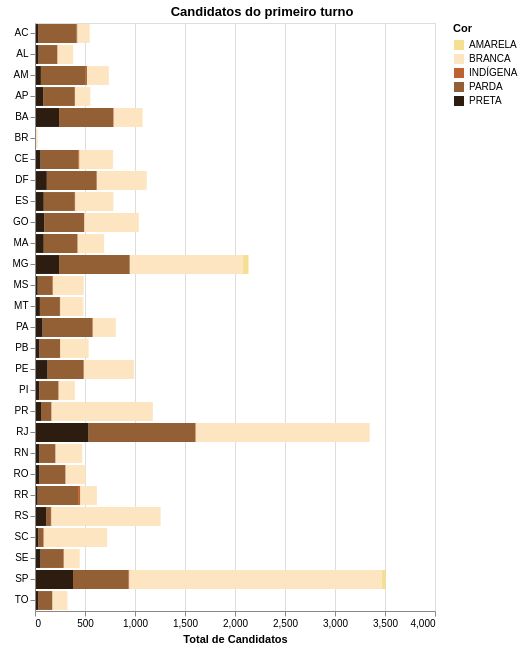

In [7]:
alt.Chart(turno_uf_raca_tidy[lambda df: df.NR_TURNO == 1]).mark_bar().encode(
    x=alt.X('TOTAL', title='Total de Candidatos'),
    y=alt.Y('SG_UF', title=None),
    color=alt.Color(
        'DS_COR_RACA:N',
        scale=raca_cor,
        legend=alt.Legend(title='Cor'),
    )
).properties(title='Candidatos do primeiro turno')

In [8]:
turno_uf_genero_tidy = (
    candidatos
    .groupby([
        'NR_TURNO',
        'SG_UF',
        'DS_GENERO'
    ])
    .size()
    .rename('TOTAL')
    .reset_index()
)

turno_uf_genero_tidy.head()

,NR_TURNO,SG_UF,DS_GENERO,TOTAL
0,1,AC,FEMININO,173
1,1,AC,MASCULINO,375
2,1,AL,FEMININO,117
3,1,AL,MASCULINO,264
4,1,AM,FEMININO,225


In [9]:
(
    turno_uf_genero_tidy
    .set_index([
        'NR_TURNO',
        'SG_UF',
        'DS_GENERO'
    ])
    .unstack(['NR_TURNO', 'DS_GENERO'])
    .fillna(0)
    .applymap(int)
)

TOTAL                             
NR_TURNO         1                  2          
DS_GENERO FEMININO MASCULINO FEMININO MASCULINO
SG_UF                                          
AC             173       375        0         0
AL             117       264        0         0
AM             225       515        1         3
AP             171       381        1         3
BA             332       743        0         0
BR               7        19        1         3
CE             231       550        0         0
DF             343       772        0         4
ES             245       539        0         0
GO             323       716        0         0
MA             222       470        0         0
MG             653      1482        0         4
MS             159       329        0         4
MT             150       333        0         0
PA             250       560        0         4
PB             161       375        0         0
PE             316       675        0         0
PI             125       274        0         0
PR             358       820        0         0
RJ            1021      2327        0         4
RN             150       323        1         3
RO             145       362        0         4
RR             194       425        0         4
RS             400       856        0         4
SC             225       496        1         3
SE             143       305        2         2
SP            1108      2399        1         3
TO              94       230        0         0

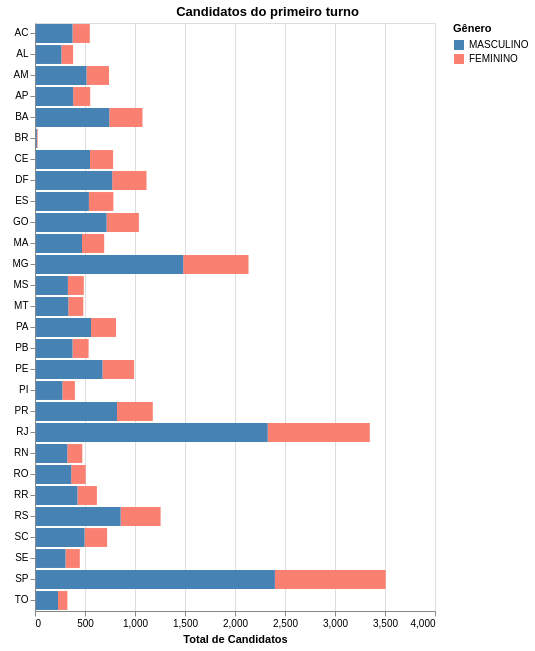

In [10]:
alt.Chart(turno_uf_genero_tidy[lambda df: df.NR_TURNO == 1]).mark_bar().encode(
    x=alt.X('TOTAL', title='Total de Candidatos'),
    y=alt.Y('SG_UF', title=None),
    color=alt.Color(
        'DS_GENERO:N',
        scale=genero_cor,
        legend=alt.Legend(title='Gênero'),
    )
).properties(title='Candidatos do primeiro turno')

In [11]:
proporcao_genero_tidy = (
    candidatos
    .loc[lambda df: df.NR_TURNO == 1]
    .groupby([
        'SG_PARTIDO',
        'DS_GENERO'
    ])
    .size()
    .rename('TOTAL')
    .reset_index()
)

proporcao_genero_tidy.head()

,SG_PARTIDO,DS_GENERO,TOTAL
0,AVANTE,FEMININO,269
1,AVANTE,MASCULINO,664
2,DC,FEMININO,196
3,DC,MASCULINO,451
4,DEM,FEMININO,185


In [12]:
proporcao_genero = (
    proporcao_genero_tidy
    .set_index(['SG_PARTIDO', 'DS_GENERO'])
    .unstack(['DS_GENERO'])
    .TOTAL
    .assign(PROPORCAO_FEMININO=lambda df: df.FEMININO / df.sum(axis='columns'))
    .sort_values('PROPORCAO_FEMININO', ascending=False)
)

proporcao_genero

DS_GENERO,FEMININO,MASCULINO,PROPORCAO_FEMININO
SG_PARTIDO,,,
PMB,155,231,0.401554
PSTU,73,114,0.390374
PCO,10,19,0.344828
PC do B,254,498,0.337766
PV,275,547,0.334550
MDB,339,676,0.333990
PSOL,420,843,0.332542
PT,380,777,0.328436
PSDB,284,583,0.327566


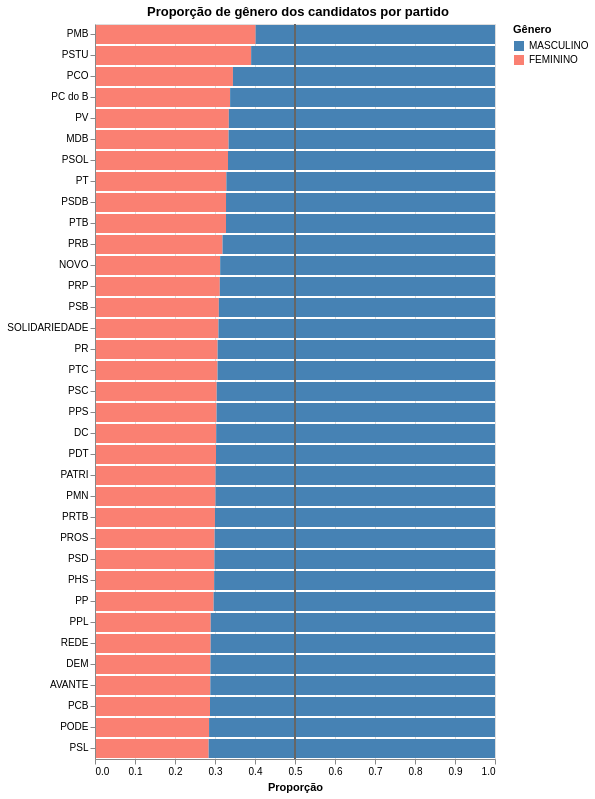

In [13]:
(
    alt
    .Chart(proporcao_genero_tidy)
    .mark_bar()
    .encode(
        x=alt.X('TOTAL', stack='normalize', title='Proporção'),
        y=alt.Y('SG_PARTIDO', sort=list(proporcao_genero.index), title=None),
        color=alt.Color(
            'DS_GENERO:N',
            scale=genero_cor,
            legend=alt.Legend(title='Gênero')
        ),
        order=alt.Order('DS_GENERO')
    )
    + alt.Chart(
        proporcao_genero_tidy[['SG_PARTIDO']]
        .drop_duplicates()
        .assign(TOTAL=0.5)
    )
    .mark_rule(
        color='#666'
    ).encode(x='TOTAL')
).properties(title='Proporção de gênero dos candidatos por partido')

In [14]:
partido_genero_raca_tidy = (
    candidatos
    .loc[lambda df: df.NR_TURNO == 1]
    .groupby([
        'SG_PARTIDO',
        'DS_GENERO',
        'DS_COR_RACA'
    ])
    .size()
    .rename('TOTAL')
    .reset_index()
)

partido_genero_raca_tidy.head(10)

,SG_PARTIDO,DS_GENERO,DS_COR_RACA,TOTAL
0,AVANTE,FEMININO,AMARELA,3
1,AVANTE,FEMININO,BRANCA,139
2,AVANTE,FEMININO,INDÍGENA,1
3,AVANTE,FEMININO,PARDA,106
4,AVANTE,FEMININO,PRETA,20
5,AVANTE,MASCULINO,BRANCA,327
6,AVANTE,MASCULINO,PARDA,274
7,AVANTE,MASCULINO,PRETA,63
8,DC,FEMININO,AMARELA,1
9,DC,FEMININO,BRANCA,84


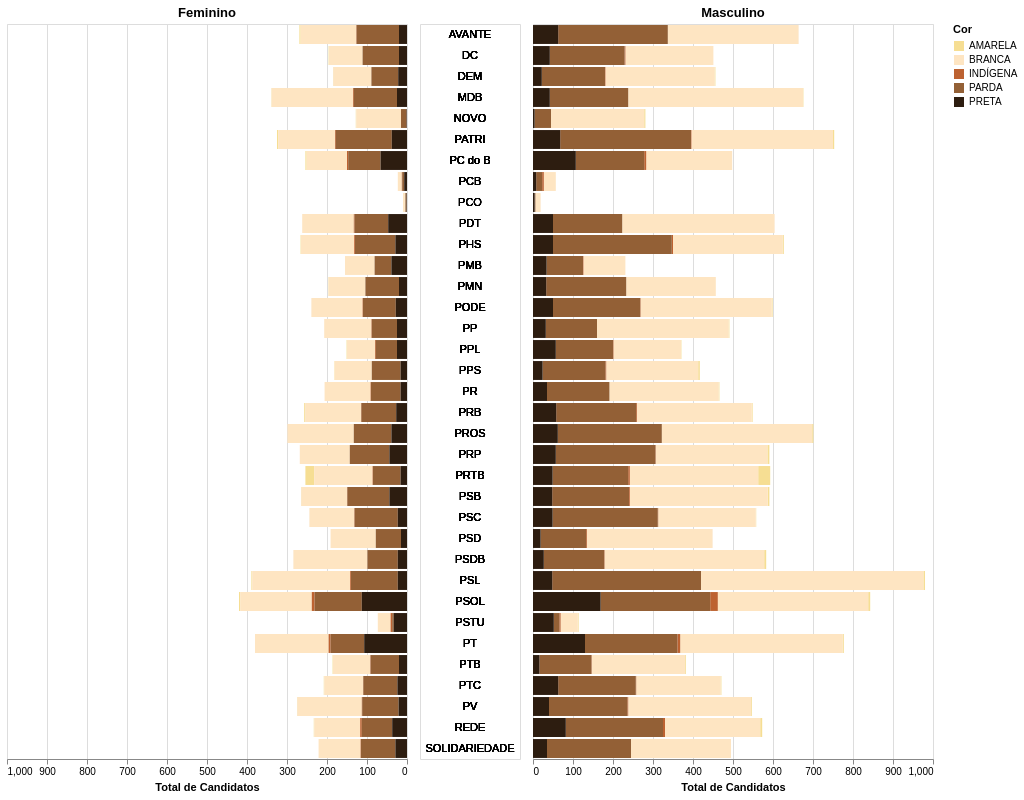

In [15]:
scale = alt.Scale(domain=[
    0,
    partido_genero_raca_tidy
    .groupby(['SG_PARTIDO', 'DS_GENERO'])
    .TOTAL
    .sum()
    .values
    .max()
])
color = alt.Color(
    'DS_COR_RACA:N',
    scale=raca_cor,
    legend=alt.Legend(title='Cor')
)

axis = alt.Axis(title='Total de Candidatos')

base = alt.Chart(partido_genero_raca_tidy)

(
    base
    .transform_filter(datum.DS_GENERO == 'FEMININO')
    .mark_bar()
    .encode(
        x=alt.X('sum(TOTAL):Q', axis=axis, sort=alt.SortOrder('descending'), scale=scale),
        y=alt.Y('SG_PARTIDO', axis=None),
        color=color,
    )
    .properties(title='Feminino')

    |

    base
    .encode(
        y=alt.Y('SG_PARTIDO:N', axis=None),
        text=alt.Text('SG_PARTIDO:N'),
    )
    .mark_text(baseline='middle')
    .properties(width=100)

    |

    base
    .transform_filter(datum.DS_GENERO == 'MASCULINO')
    .mark_bar()
    .encode(
        x=alt.X('sum(TOTAL):Q', axis=axis, scale=scale),
        y=alt.Y('SG_PARTIDO', axis=None),
        color=color,
    )
    .properties(title='Masculino')
)

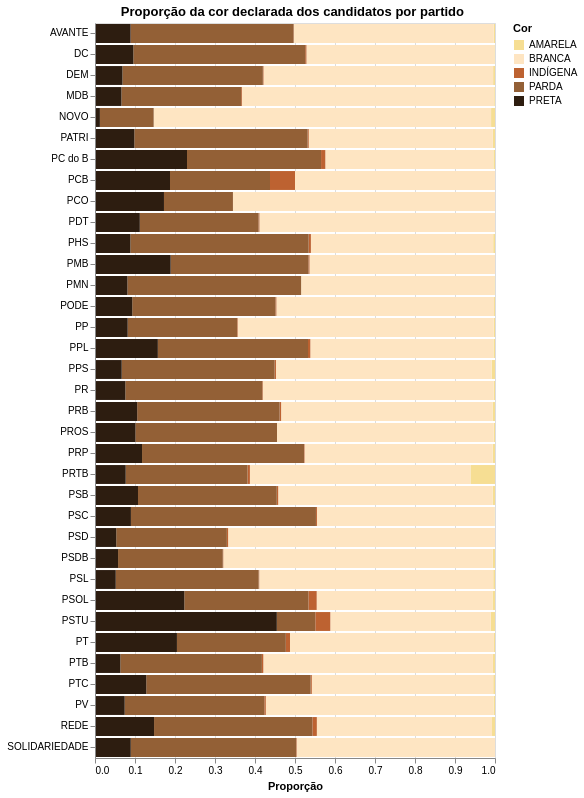

In [16]:
(
    alt
    .Chart(
        partido_genero_raca_tidy
        .groupby(['SG_PARTIDO', 'DS_COR_RACA'])
        .TOTAL
        .sum()
        .reset_index()
    )
    .mark_bar()
    .encode(
        x=alt.X('TOTAL:Q', stack='normalize', title='Proporção'),
        y=alt.Y('SG_PARTIDO:N', title=None),
        color=color,
    )
    .properties(title='Proporção da cor declarada dos candidatos por partido')
)